<a href="https://colab.research.google.com/github/AishlyManglani/Deep-Learning_-CMPE258/blob/main/neural%20networks/pytorch_built_in_3layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pytorch built in
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Generate synthetic data
def generate_data(n=1000):
    x1 = np.random.uniform(-1, 1, n)
    x2 = np.random.uniform(-1, 1, n)
    x3 = np.random.uniform(-1, 1, n)
    y = np.sin(x1) + np.cos(x2) + x3**2  # Nonlinear function
    return np.vstack((x1, x2, x3)).T, y.reshape(-1, 1)

# Convert data to PyTorch tensors
X_np, y_np = generate_data()
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32)

In [3]:
# Define the neural network class
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden1, hidden2, output_dim):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # Linear output for regression
        return x

# Training function
def train(model, X, y, epochs=1000, learning_rate=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

    return losses

Epoch 0, Loss: 2.0997
Epoch 100, Loss: 0.0287
Epoch 200, Loss: 0.0108
Epoch 300, Loss: 0.0059
Epoch 400, Loss: 0.0039
Epoch 500, Loss: 0.0027
Epoch 600, Loss: 0.0022
Epoch 700, Loss: 0.0019
Epoch 800, Loss: 0.0017
Epoch 900, Loss: 0.0016


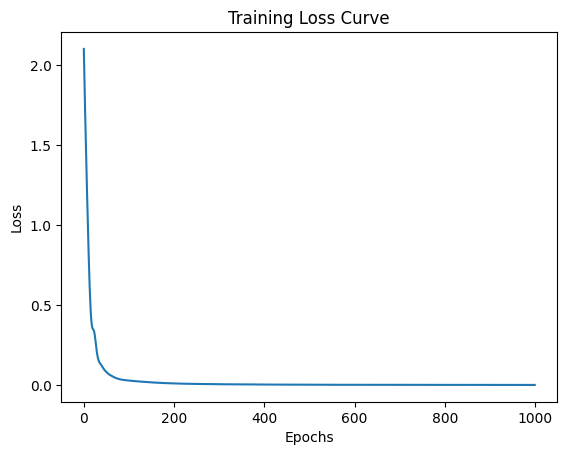

In [4]:
# Initialize model
model = NeuralNetwork(input_dim=3, hidden1=10, hidden2=10, output_dim=1)
losses = train(model, X, y)

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

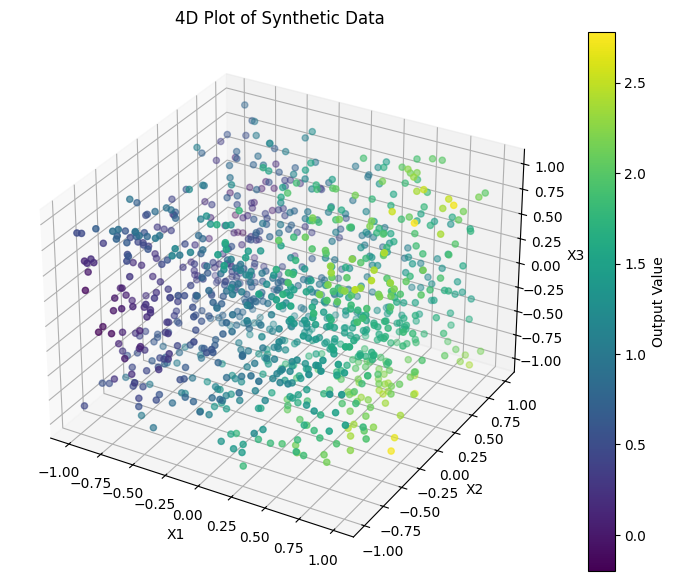

In [5]:
# 4D Plot
def plot_4d(X, y):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0].numpy(), X[:, 1].numpy(), X[:, 2].numpy(), c=y.numpy(), cmap='viridis')
    fig.colorbar(scatter, label='Output Value')
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    plt.title("4D Plot of Synthetic Data")
    plt.show()

plot_4d(X, y)
